# Medical Costs

## Dataset

##### Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

##### Load data

Hieronder kun je de eerste vijf rijen van de dataset bekijken. Er is een kolom dat charges heet. Dit is onze label. Dit is een continious waarde.

In [136]:
data = pd.read_csv('insurance.csv')

data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Probleem

Voordat we naar de ziekenhuis gaan om onze hart te laten controleren voor ziektes ([Heart Disease](https://gitlab.fdmci.hva.nl/ozcana3/logboek-ai/-/blob/main/Machine%20Learning/heart_disease.ipynb)), moeten we even een verzekering afsluiten. Als we dit niet zouden doen, zouden de kosten voor medische onderzoek misschien wel hoog kunnen zijn (Americaaa).

Daarom lijkt het me even handig om te berekenen wat de kosten voor het afsluiten van een verzekering zou zijn (medisch gericht). Berekenen? Hoe bereken je dat nou weer? Help! Ik kan niet rekenen! 

Om je moeite te besparen, wordt er in dit verslag een AI model gemaakt die voor ons de verzekering kan voorspellen. Zo zouden we dit kunnen gebruiken voor meerdere mensen zonder zelf iets te berekenen.

Als classifiers worden de volgende gebruikt:
- Liniaire Regression
- Decision Tree Regressor
- Support Vector Regressor

We proberen de classifiers zo optimaal mogelijk te maken en bekijken hoe ze met elkaar verschillen. Welke zal de beste resultaat geven?

Om het resultaat te meten, wordt de R2 metrics gebruikt, omdat deze een goede metrics is voor regressie modellen.

In [3]:
data.shape

(1338, 7)

In [4]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

**Insights**
- De dataset bevat 1338 rijen en 7 kolommen
- Er zijn verschillende type datas. 3 objecten (strings), 4 getallen

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


**Insights**
- De meesten zijn tussen de 27 en 51 jaar oud
- De gemiddelde BMI is afgerond 31, wat aanduid op obesitas. Misschien dat er een sterke correlatie tussen de twee zijn?
- een BMI van 53 is wel erg hoog. Een persoon met een BMI van 35 heeft al extreem obesitas. Wat is 53 dan? Een uitsmijter misschien?
- De standaardafwijking van age is wel groot. Er zijn dus best veel verschillenden met verschillende leeftijden.

In [6]:
data.describe(include='object')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


## Voorspelling

Persoonlijk denk ik dat KNN of SVR het beste resultaat zal geven. Ik verwacht namelijk dat dit geen lineare probleem zal zijn en hierdoor valt linear regression al weg. KNN kan hiervoor wel goed zijn, aangezien er veel factoren zijn die gegroepeerd kunnen worden. Denk aan smokers die hoogstwaarschijnlijk meer moeten betalen dan niet smokers. KNN kan het denk ik wel hier goed mee doen. SVR heb ik nooit mee gewerkt, maar ben er wel beniewd naar. Aangezien ik er niet veel van afweet, heb ik op internet gezocht naar voorbeelden. Met de juiste hyperparameters denk ik dat SVM goed kan werken. 

Decision tree en Random Forest zouden ook wel kunnen, alleen moeten we de hyperparameters optimaliseren willen we een goed werkend decision tree krijgen. 

Dit is een regressie probleem die een continious waarde probeert te voorspellen. Bij regressieproblemen is het gebruik van R2 geschikt als metrics. 





**Insights**
- Sex en smoker bevatten beide twee unieke waardes. Booleans, dus. Dit moeten we omzetten.

## Methoden

##### Pre-processing

In [7]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
data.duplicated().sum()

1

**Insights**
- Er zijn geen lege cellen in de dataset
- Er is 1 kolom dat gedupliceerd is.

In [9]:
data.drop_duplicates(inplace=True)

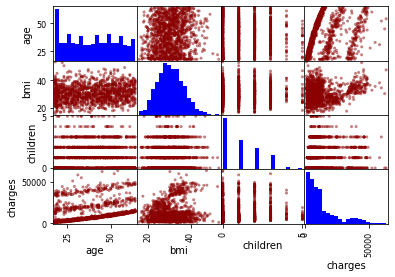

In [145]:
pd.plotting.scatter_matrix(data, color='darkred', hist_kwds={'bins':20, 'color':'blue'})
plt.show()

**Insights**
- BMI is normaal verdeeld
- Aantal charges worden veel minder naarmate de charges hoger zijn.
- Er zijn heel wat meer smokers dan niet-smokers.

<AxesSubplot:xlabel='age', ylabel='Count'>

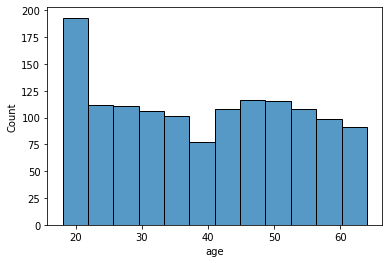

In [10]:
sns.histplot(data['age'])

**Insights**
- Er zijn heel veel kolommen waarbij de leeftijd 20 is. Veel meer dan de rest
- Er zijn weinig 40 jaars.

Categorisch -> Numeriek

In [11]:
categorical_features = ['sex','smoker','region']

from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

data[categorical_features] = data[categorical_features].apply(lb.fit_transform)

data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


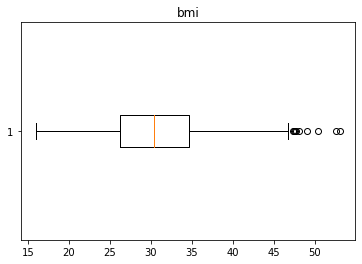

In [12]:
plt.boxplot(data['bmi'], vert=False)
plt.title('bmi')
plt.show()

**Insights**
- Er zijn inderdaad wat uitschieters. Ik beschouw 50 of er boven als uitschieter.

In [13]:
data = data[data['bmi'] <= 50]

<AxesSubplot:>

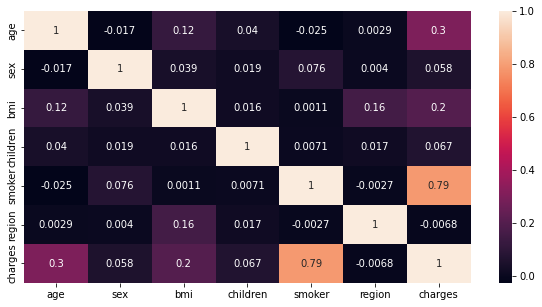

In [14]:
plt.figure(figsize=(10, 5))
sns.heatmap(data.corr(),annot=True)

**Insights**
- Age is redelijk sterk gerelateerd aan charges
- BMI is redelijk sterk gerelateerd aan charges
- Smoker is zeer sterk gerelateerd aan charges
- De features hebben niet echt een correlatie met elkaar.

Aangezien de features niet echt een correlatie met elkaar hebben, verwijderen we degene die zwak zijn gerelateerd aan charges.

In [15]:
data = data.drop(["sex", "children", "region"], axis=1)
data.head()

,age,bmi,smoker,charges
0,19,27.900,1,16884.92400
1,18,33.770,0,1725.55230
2,28,33.000,0,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


<AxesSubplot:xlabel='age', ylabel='Count'>

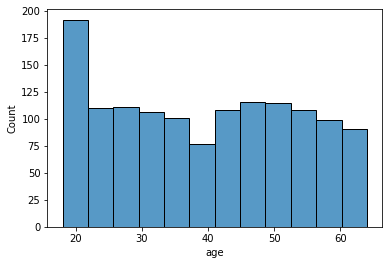

In [16]:
sns.histplot(data['age'])

**Insights**
- Er zijn heel wat meer 20 jarigen dan de rest
- 40 jarigen vallen beetje onder

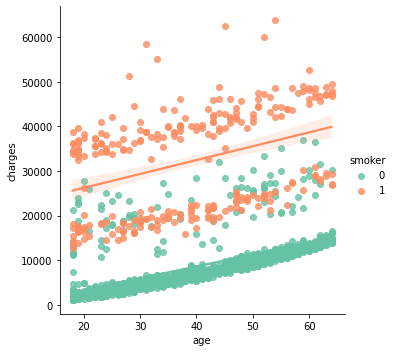

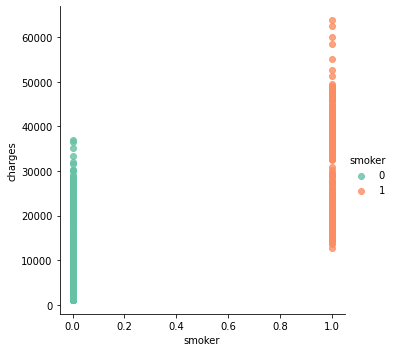

In [17]:
sns.lmplot(x = 'age', y = 'charges' , hue = 'smoker', data = data, palette = 'Set2')
sns.lmplot(x = 'smoker', y = 'charges', hue="smoker" ,data = data, palette = 'Set2')

**Insights**
- Charges zijn duidelijk hoger als iemand rookt.

<AxesSubplot:xlabel='bmi', ylabel='Count'>

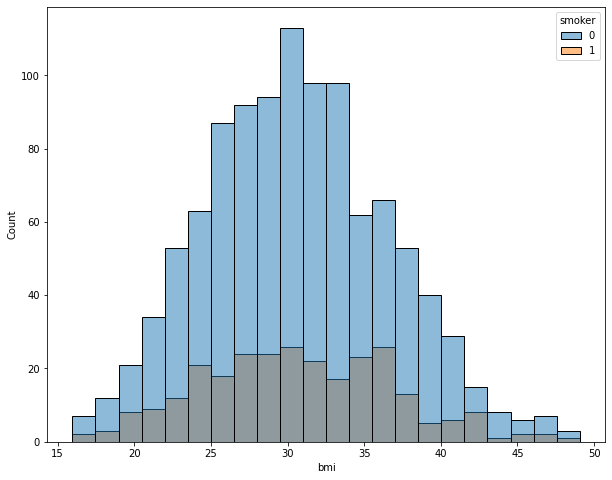

In [18]:
plt.figure(figsize=(10,8))
sns.histplot(data,x='bmi',multiple='layer',hue = 'smoker')


**Insights**
- BMI is normaal verdeeld
- De meesten hebben een BMI tussen de 25 en 35.

<AxesSubplot:xlabel='charges', ylabel='Count'>

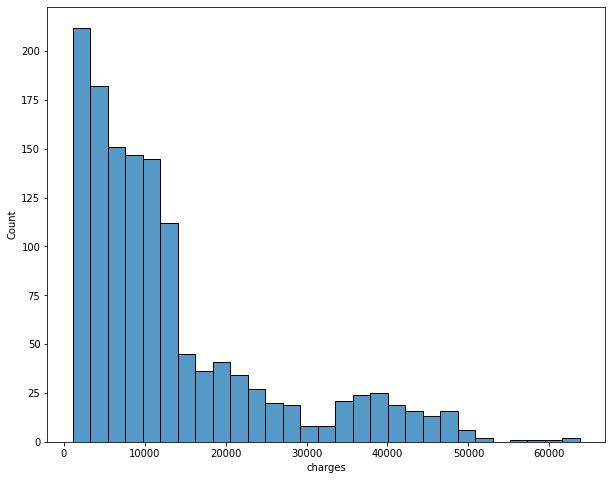

In [19]:
plt.figure(figsize=(10,8))
sns.histplot(data,x='charges')

**Insights**
- Ziet er niet linear uit
- De meeste charges zijn aan het begon (rons 5000-10000).

Split data

In [20]:
X = data.drop(['charges'], axis=1)
y = data['charges']

Split de data tussen 75% train en 25% test

In [146]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [22]:
X_train.shape, X_test.shape

((1000, 3), (334, 3))

In [147]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler


sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_y.fit_transform(X_test)



##### Classifiers

Als classifiers worden de volgende gebruikt:
- Liniaire Regression
- Decision Tree Regressor
- Support Vector Regressor

Om het resultaat te meten, wordt de R2 metrics gebruikt, omdat deze een goede metrics is voor regressie modellen.

In [182]:
def show_results(y_set, pred, test=True):
    print(f"R2 Score {'X_test' if test else 'X_train'}: ", r2_score(y_set, pred))

def plot_r2_score(y_test, pred):
    plt.figure(figsize=(5,5))
    plt.xlabel("predicted label")
    plt.ylabel("actual label")
    plt.scatter(pred, y_test)
    plt.plot([0, 50000], [0,50000], color='red')
    plt.show()

##### Lineaire Resgressie

In [80]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [168]:

pred_train = lr.predict(X_train)
pred_test = lr.predict(X_test)

show_results(y_train, pred_train, False)
show_results(y_test, pred_test)

R2 Score X_train:  0.7419328626981768
R2 Score X_test:  0.7616077881369405


De R2 voor de test is hoger dan de train. Dat is gek. Dit betekent dat de test set teveel lijkt op de train set. Dit kunnen we oplossen door de train_test_split opnieuw uit te voeren, maar ook door de n-fold cross validation toe te passen. Ik ga voor de tweede optie om meer te leren over crossvalidation

In [88]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr, X_train, y_train, cv=7)
scores2 = cross_val_score(lr, X_test, y_test, cv=7)

print(scores.mean())
print(scores2.mean())

0.7242014440586172
0.7184341124555835


Zonder hyperparameters: 
- Train: 0.74
- Test: 0.76
- train data lijkt te veel op test data?

Cross validation:
- Train: 0.72
- Test: 0.71
- underfit

M.b.v. crossvalidation hebben we gefixt dat de train en test data op elkaar lijken. De R2 score geeft een reele score. Het zou raar zijn als test data score beter is dan train data score.

##### DecisionTreeRegressor

In [27]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(max_depth=5, min_samples_leaf=6, min_samples_split=4, random_state=11)
dtr.fit(X_train,y_train)

y_pred_train = dtr.predict(X_train)
y_pred_test = dtr.predict(X_test)

show_results(y_train, y_pred_train, False)
show_results(y_test, y_pred_test)


R2 Score X_train:  0.8731634445665304
R2 Score X_test:  0.8497983418961482


**Insights**

zonder hyperparameters:
- Train: 1.0
- Test: 0.7
- overfit

Params - max_depth=15
- Train: 0.99
- Test: 0.65
- overfit

params - max_depth=10
- Train: 0.97
- Test: 0.69
- overfit

params- max_depth=5
- Train: 0.87
- Test: 0.85
- prima


min_samples_leaf & min_samples_split geven alleen maar dezelfde scores

In [183]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(max_depth=5, min_samples_leaf=2, min_samples_split=3, random_state=11, n_estimators=8)
rfr.fit(X_train,y_train)

y_pred_train = rfr.predict(X_train)
y_pred_test = rfr.predict(X_test)

show_results(y_train, y_pred_train, False)
show_results(y_test, y_pred_test)

R2 Score X_train:  0.8778331393636661
R2 Score X_test:  0.8591040785977662


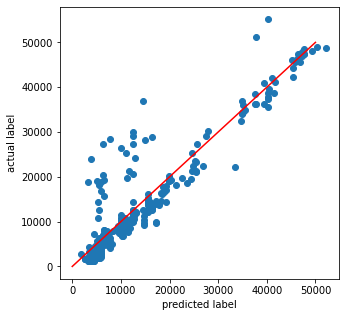

In [184]:
plot_r2_score(y_test, y_pred_test)


**Insights**
- Met dezelfde waardes als de beste van DTR, is deze wat beter
- n-estimators na 8 blijven dezelfde score geven
- redelijk weinig verspreiding van normale lineare lijn

##### KNeighborsRegressor

In [129]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=8, n_jobs=-1)

knn.fit(X_train, y_train)

KNeighborsRegressor(n_jobs=-1, n_neighbors=8)

In [180]:

y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

show_results(y_train, y_pred_train, False)
show_results(y_test, y_pred_test)

R2 Score X_train:  0.8682354947225639
R2 Score X_test:  0.8480735142034913


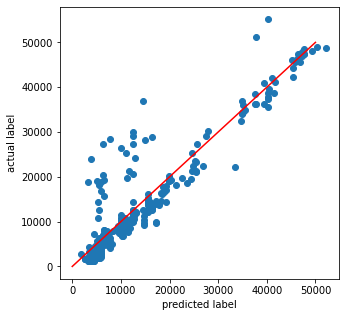

In [185]:
plot_r2_score(y_test, y_pred_test)

**Insights**
- De scores zien er prima uit. Geen under- of overfitting
- Beter dan linear

In [43]:
from sklearn.model_selection import GridSearchCV

params = {'kernel' : ('linear','rbf', 'sigmoid'),'C' : [1,5,10],'degree' : [3,8],'gamma' : ('auto','scale')}


gsvr = GridSearchCV(SVR(), params, n_jobs=-1, scoring='r2')

gsvr.fit(X_train, y_train)

gsvr.best_estimator_


SVR(C=10, gamma='auto', kernel='linear')

In [76]:
svr = SVR(C=100,kernel='linear')
svr.fit(X_train, y_train)

SVR(C=100, kernel='linear')

In [176]:
y_pred_train = svr.predict(X_train)
y_pred_test = svr.predict(X_test)

show_results(y_train, y_pred_train, False)
show_results(y_test, y_pred_test)

R2 Score X_train:  0.6136317214016979
R2 Score X_test:  0.6156382965378853


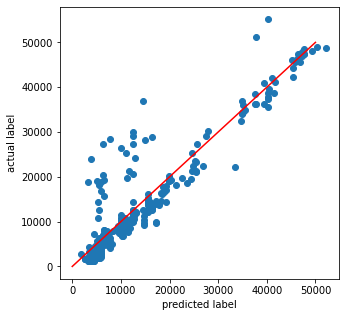

In [186]:
plot_r2_score(y_test, y_pred_test)

**Insights**
- Lage R2 score
- underfit
- veel verspreiding van de normale lijn

### Conclusie

Random Forest en KNN zijn de beste classifiers voor dit probleem. Random Forest is net aan ietjes beter, maar ik verwacht dat beiden het beter kunnen. Ik verwacht dat RFR het ietjes beter zal kunnen als we even de juiste hyperparameters kunnen vinden. Bij deze opdracht heb ik niet al te veel gelet op hyperparameters. 

Lineare regressie deed het niet al te best. Het een een R2 score van 0.77. Dit komt doordat de probleem ook niet echt een lineare verband heeft waarschijnlijk. 

SVR deed het niet al te best. Het heeft een R2 score van 0.63, maar het is wel underfit. Als we de juiste hyperparameters ervoor vinden, verwacht ik dat deze wel gaat stijgen.

**Verbeteringen**

We kunnen de modellen verbeteren door:
- Een grotere dataset nemen. Deze dataset is wel klein.
- Een ander probleem nemen. De features hebben niet een al te sterke relatie met de label en de relatie is niet linear.
- Hyperparameters waardes verbeteren


### Bronnen

- https://www.analyticsvidhya.com/blog/2020/03/support-vector-regression-tutorial-for-machine-learning/
- https://www.tutorialspoint.com/how-to-overplot-a-line-on-a-scatter-plot-in-python
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
- https://aegis4048.github.io/mutiple_linear_regression_and_visualization_in_python